In [36]:
import file_load
import preprocess

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')

In [37]:
df = file_load.load_merged_current_version()

In [38]:
df['is_test'].value_counts()

is_test
0    1118822
1       9272
Name: count, dtype: int64

In [39]:
preprocess.아파트_unique_key_add(df)

In [40]:
apts = df.drop_duplicates(subset=['아파트_unique_key'])[['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수']]

In [41]:
apts.head()

,아파트_unique_key,아파트명,좌표X,좌표Y,평수
0,강남구_개포동_658-1_개포6차우성_1987,개포6차우성,127.057210,37.476763,24
12,강남구_개포동_652_개포우성3차_1984,개포우성3차,127.055990,37.483894,40
25,강남구_개포동_12-2_개포자이_2004,개포자이,127.076624,37.496296,46
38,강남구_개포동_141_개포주공1단지_1982,개포주공1단지,127.058521,37.480002,12
204,강남구_개포동_187_개포주공5단지_1983,개포주공5단지,127.068028,37.487802,22


In [42]:
apts.columns

Index(['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수'], dtype='object')

In [43]:
apts.isnull().sum()

아파트_unique_key    0
아파트명              0
좌표X               0
좌표Y               0
평수                0
dtype: int64

In [44]:
coordinates = apts[["좌표X", "좌표Y"]]

In [45]:
coordinates

,좌표X,좌표Y
0,127.057210,37.476763
12,127.055990,37.483894
25,127.076624,37.496296
38,127.058521,37.480002
204,127.068028,37.487802
...,...,...
4738,126.935946,37.544875
5901,127.013520,37.517163
6087,127.063427,37.548716
8880,126.996600,37.564541


In [46]:
# 클러스터링에 사용할 좌표만 추출

# K-Means 모델 생성 및 학습 (클러스터 수는 3으로 설정)
kmeans = KMeans(n_clusters=8
                , random_state=42)


In [47]:
apts['좌표_클러스터'] = kmeans.fit_predict(coordinates)

/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
apts.shape

(9032, 6)

In [49]:
apts.columns

Index(['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수', '좌표_클러스터'], dtype='object')

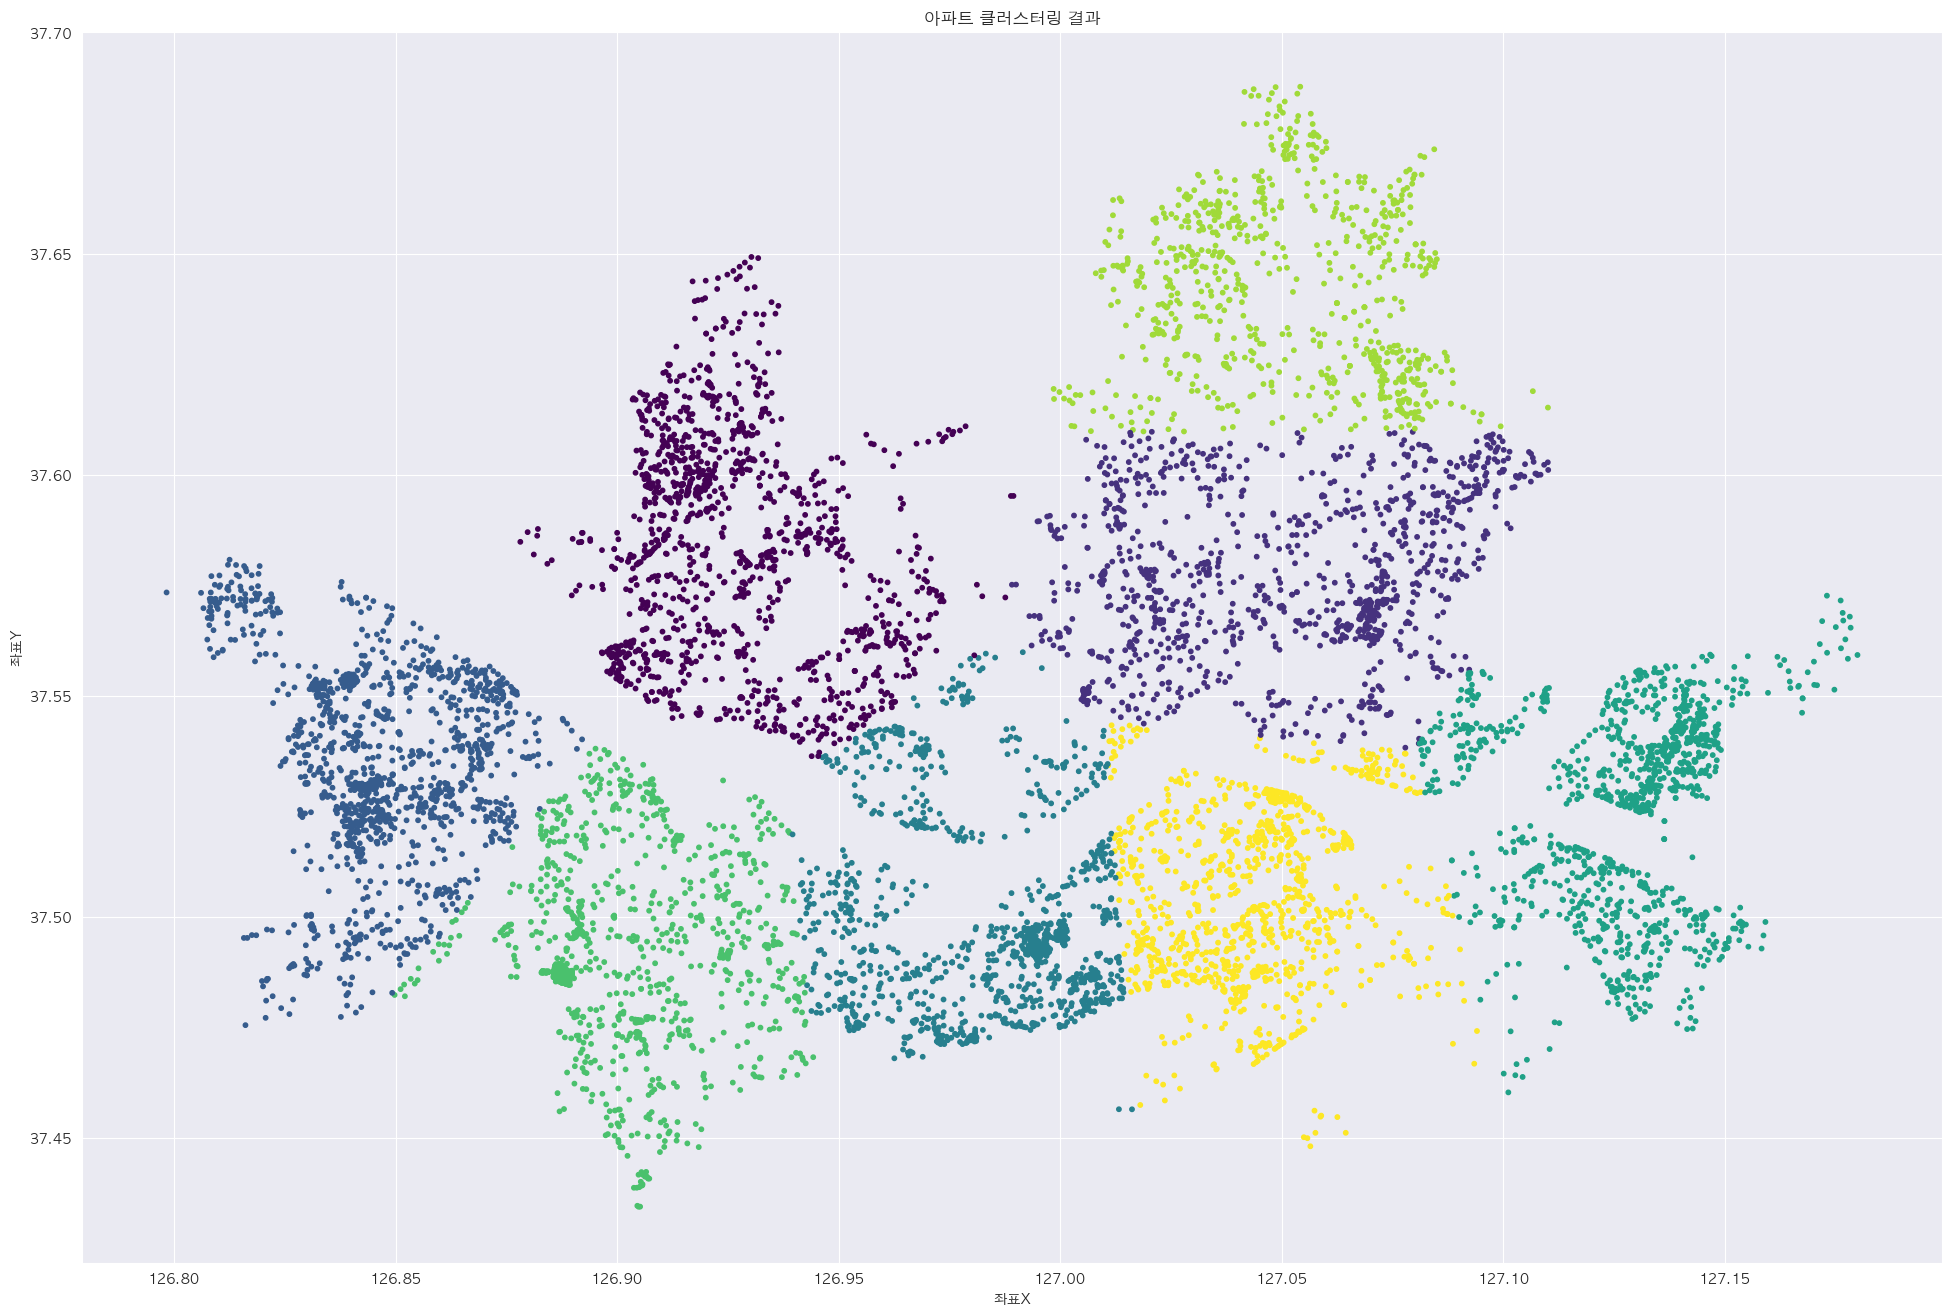

In [51]:
# 클러스터 결과 시각화
plt.figure(figsize=(24, 16))  # 가로 12인치, 세로 8인치

plt.scatter(apts['좌표X'], apts['좌표Y'], c=apts['좌표_클러스터'], cmap='viridis', s=10)
plt.xlabel('좌표X')
plt.ylabel('좌표Y')
plt.title('아파트 클러스터링 결과')
plt.show()

In [52]:
apts.to_csv('../data/아파트단지_좌표_클러스터.csv', index=False)

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 수별 WCSS 저장
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)


/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/

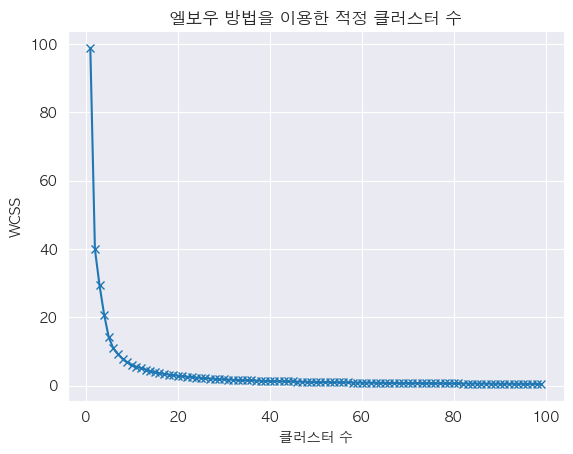

In [22]:
# WCSS 시각화
plt.plot(range(1, 100), wcss, marker='x')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.title('엘보우 방법을 이용한 적정 클러스터 수')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(coordinates)
    silhouette_scores.append(silhouette_score(coordinates, labels))



/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/

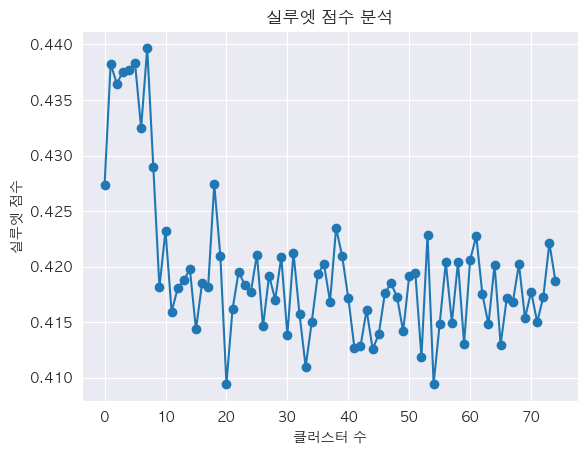

In [19]:
# x축 범위를 silhouette_scores에 맞게 조정
plt.plot(range(1, len(silhouette_scores)), silhouette_scores, marker='x')
plt.xlabel('클러스터 수')
plt.ylabel('실루엣 점수')
plt.title('실루엣 점수 분석')
plt.show()

In [20]:
df.head()

,index,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,...,한강거리,지가지수,아파트전세_전기대비증감률,실업률,민간소비,소비자심리지수,경제심리지수,여수신 금리차,is_test,아파트_unique_key
0,0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
1,1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
2,2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
3,3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
4,4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987


In [21]:
# result.to_csv('../data/아파트_unique_key_마지막_계약년월.csv', index=False)
